<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [16]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [18]:
df = pd.read_csv("/mnt/c/Users/sfgia/Desktop/MDST/data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [59]:
df.head()


263.55871886120997

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [30]:
df["YEAR"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
state = df.groupby("STATE")
state["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

Find the average for your outcome score across all states in 2019

In [103]:
df = df.set_index('STATE')
df[df["YEAR"] == 2019]
df["AVG_MATH_8_SCORE"].mean()

KeyError: "None of ['STATE'] are in the columns"

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [46]:
state = df_.groupby("STATE")
state["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [70]:
df['AMOUNT_FUNDING_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE']/df['ENROLL']

Final feature list: **<AMOUNT_FUNDING_PER_STUDENT>**

Feature selection justification: **<I think one feature that could be used to predict performance of the students is how much money is allocated for teaching every student.>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='AMOUNT_FUNDING_PER_STUDENT'>

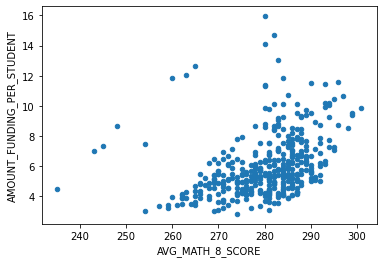

In [75]:
df.plot.scatter(x="AVG_MATH_8_SCORE", y="AMOUNT_FUNDING_PER_STUDENT")

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:ylabel='Frequency'>

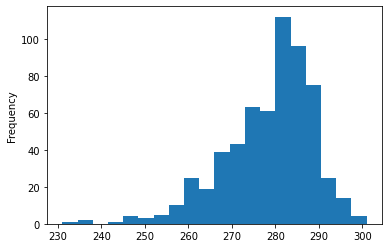

In [80]:
df["AVG_MATH_8_SCORE"].plot.hist(bins=20)


**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = df[['TOTAL_REVENUE','YEAR', 'AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index]['AMOUNT_FUNDING_PER_STUDENT']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [439, 14487]

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [94]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [95]:
# create your model here
model = LinearRegression()

In [96]:
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [115]:
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [116]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

NameError: name 'X_test' is not defined

In [123]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = AMOUNT_FUNDING_PER_STUDENT
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(AMOUNT_FUNDING_PER_STUDENT)

NameError: name 'AMOUNT_FUNDING_PER_STUDENT' is not defined

<h2> Summary </h2>

**<This was my first time every working with python. I have some experience with C++ and R, so I was able to pick up the syntax pretty easily. I still need to work on my data analytics skills and trouibleshooting certain errors, but the tutorials really helped intorduce me to the work we'll be doing this semester. I learned how to import a csv file and some basic commands to inspect, alter, and clean the data set. I also learned how to sort and filter the dataset in certain ways to answer some corelation questions. I also messed around with some of the visualization tools that were covered in the tutorial. Unfortunately, I ran into some errors when working with the linear regression modeling. I tried out a few different things, including copying over the code from tutorial 2, but I could not find a work around. I'll be sure to clear this up next meeting, and mess around with it more once its working properly. I'm very excited to learn more about python, machine learning, and data analytics as a whole. This is going to be a fun semester! - Henry>**